In [ ]:
MERCHAINDISE = 'BTCUSDT'
DAYS = 100
START_DATE = '2021-9-7'
END_DATE = '2021-9-28'
    

In [ ]:
# Private function

def report_by_hour(hour, hour_df): 
    hour_observe = hour
    data_prices_str = f"data_prices_{hour_observe}"
    type_continuous_str = f"type_continuous_{hour_observe}"

    data_prices_up = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'up')]
    data_prices_down = data_prices[(data_prices['hour'] == hour_observe) & (data_prices['type'] == 'down')]

    print(f"Giờ {hour_observe}")
    print("________________________________")
    print(data_prices_up['hour_return'].describe())
    print(data_prices_up['hour_return'].sum())


    print("+++")
    print(data_prices_down['hour_return'].describe())
    print(data_prices_down['hour_return'].sum())

    data_prices[data_prices['hour'] == hour_observe]['hour_return'].plot(figsize=[20,10], kind='bar')


    print('____________________________________________________________')

    data_prices_by_hour = data_prices[(data_prices['hour'] == hour_observe)]
    hour_df = data_prices_by_hour

    data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')

    type_continuous_group = data_prices_by_hour.groupby([type_continuous_str]).size()

    labels = type_continuous_group.index.values
    sizes = type_continuous_group.values

    plt.figure()
    fig1, ax1 = plt.subplots(figsize=(12, 7))
    ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    plt.legend()
    plt.show()

    print(type_continuous_group)

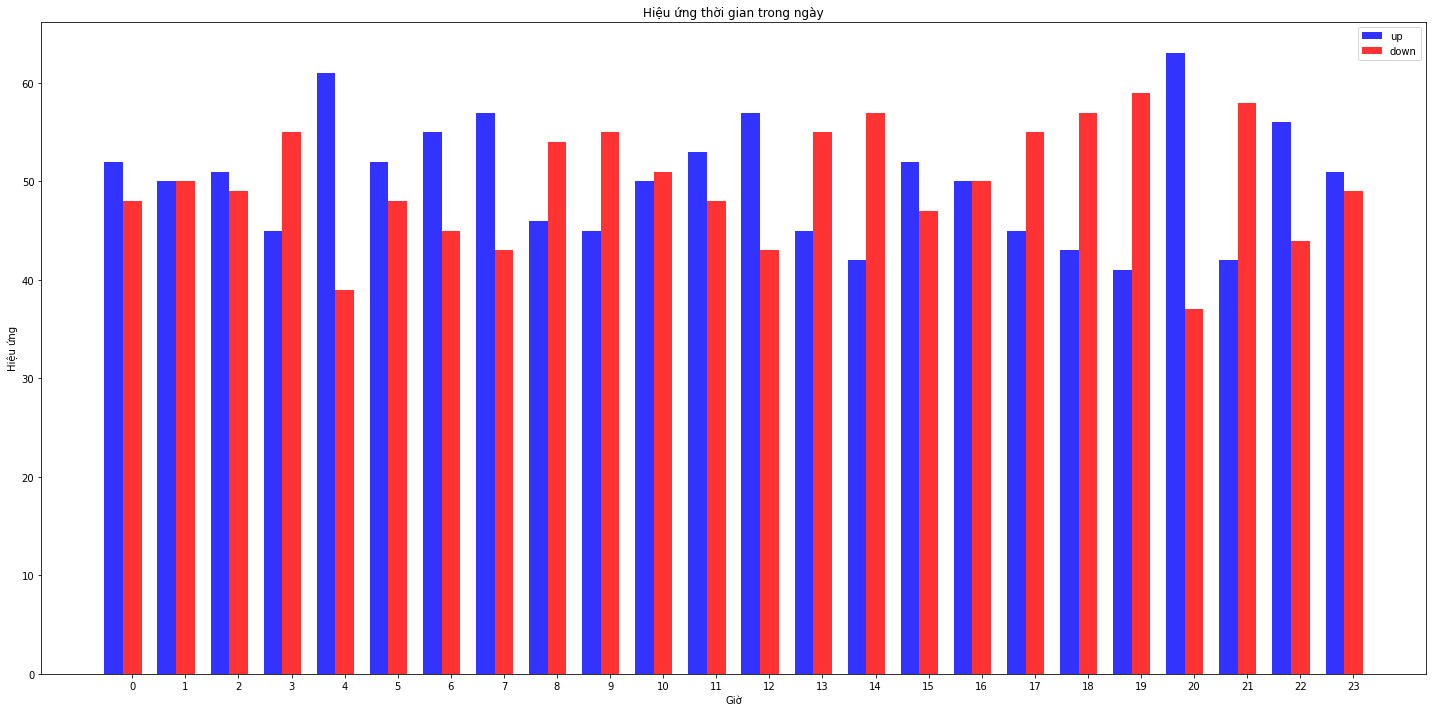

______________________________Hour return____________________________
________________________________
count    1204.000000
mean        0.468332
std         0.494863
min         0.000000
25%         0.145402
50%         0.326560
75%         0.615267
max         4.844564
Name: hour_return, dtype: float64
563.8715884745474
+++
count    1196.000000
mean       -0.450712
std         0.485334
min        -6.357900
25%        -0.591314
50%        -0.326117
75%        -0.140716
max        -0.000160
Name: hour_return, dtype: float64
-539.052133709383
______________________________Loại tiếp diễn____________________________


<Figure size 720x720 with 0 Axes>

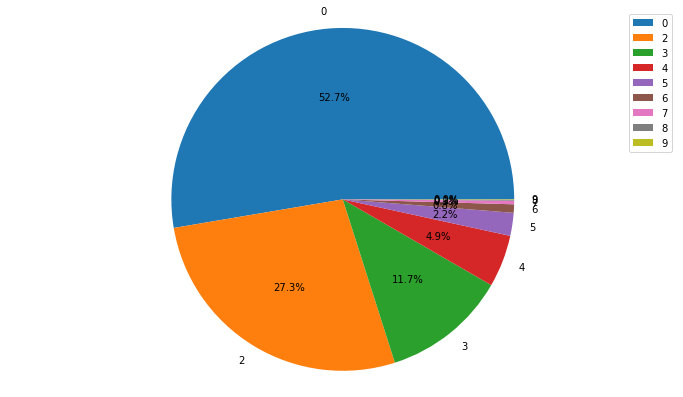

type_continuous
0    1264
2     654
3     282
4     118
5      52
6      19
7       8
8       2
9       1
dtype: int64
______________________________Thời gian biến động nhất____________________________


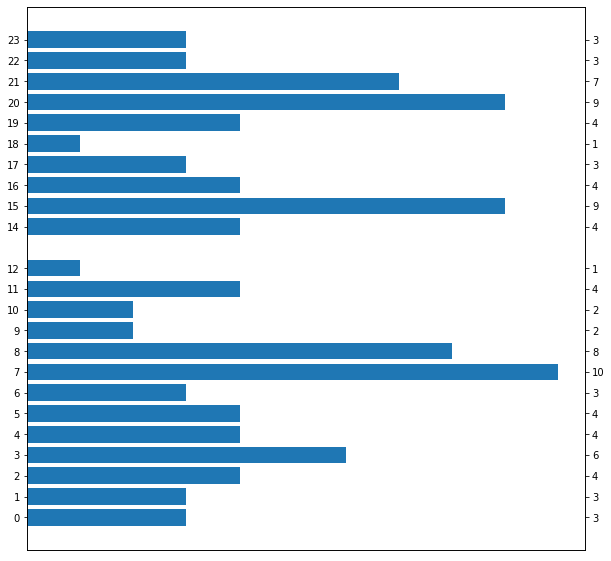

In [4]:
from myenv.models.candlestick import Candlestick
from myenv.helpers.constants import HIGH_INDEX, LOW_INDEX, OPEN_INDEX, CLOSE_INDEX
from myenv.models.merchandise_rate import MerchandiseRate
from myenv.helpers.utils import percentage_change, candlestick_type, type_continuous, until_now_type, candlestick_type_by_hour
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline


merchandise_rate = MerchandiseRate()
merchandise_rate_id = merchandise_rate.find_by_slug(MERCHAINDISE)
candlestick = Candlestick(merchandise_rate_id, 'hour', 24*DAYS, "DESC")
# candlestick = Candlestick(merchandise_rate_id, 'hour', 24*50, "DESC", start_date='2021-9-7', end_date='2021-9-28')

data_prices = candlestick.to_df()


# data_prices['hour_return'] = percentage_change(data_prices, LOW_INDEX, HIGH_INDEX)
# data_prices['hour_return'] = data_prices['close'].pct_change() * 100
data_prices['hour_return'] = percentage_change(data_prices,OPEN_INDEX, CLOSE_INDEX)
data_prices['day'] = data_prices[['open']].apply(
    lambda x: x.name.strftime("%Y-%m-%d"), axis=1)
data_prices['hour'] = data_prices[['open']].apply(
    lambda x: x.name.hour, axis=1)

total = data_prices.iloc[:, 0].count()
first_date = data_prices.iloc[0].name.date()
last_date = data_prices.iloc[-1].name.date()

data_prices['type'] = candlestick_type(data_prices)
data_prices['type_continuous'] = type_continuous(data_prices, 'ASC')

index = np.arange(24)
bar_width = 0.35
opacity = 0.8

x = ()
y = ()


for i in np.arange(24):
    data_prices_x = data_prices[data_prices['hour'] == i]

    number_up = len(data_prices_x[data_prices_x['type'] == 'up'])
    number_down = len(data_prices_x[data_prices_x['type'] == 'down'])

    x = x + (number_up,)
    y = y + (number_down,)


plt.figure(figsize=[20,10])
plt.rcParams['figure.figsize'] = [10, 10]

rects1 = plt.bar(index, x, bar_width,
                 alpha=opacity, color='b', label='up')

rects2 = plt.bar(index + bar_width, y, bar_width,
                 alpha=opacity, color='r', label='down')
plt.xlabel('Giờ')
plt.ylabel('Hiệu ứng')
plt.title(
    f"Hiệu ứng thời gian trong ngày")
plt.xticks(index + bar_width, tuple(np.arange(24)))
plt.legend()
plt.tight_layout()
plt.show()


data_prices_up = data_prices[data_prices['type'] == 'up']
data_prices_down = data_prices[data_prices['type'] == 'down']

print("______________________________Hour return____________________________")

print("________________________________")
print(data_prices_up['hour_return'].describe())
print(data_prices_up['hour_return'].sum())


print("+++")
print(data_prices_down['hour_return'].describe())
print(data_prices_down['hour_return'].sum())


print("______________________________Loại tiếp diễn____________________________")

type_continuous_group = data_prices.groupby(['type_continuous']).size()


labels = type_continuous_group.index.values
sizes = type_continuous_group.values

plt.figure()
fig1, ax1 = plt.subplots(figsize=(12, 7))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend()
plt.show()

print(type_continuous_group)


print("______________________________Thời gian biến động nhất____________________________")


def highest_in_day(x):
    max = data_prices[data_prices.day == x.day].hour_return.max()
    return data_prices[(data_prices.day == x.day) & (data_prices.hour_return == max)].hour.iat[0]


data_prices['highest_in_day'] = data_prices[[
    'day']].apply(lambda x: highest_in_day(x), axis=1)

highest_in_day_group = data_prices.groupby(
    'day').mean().groupby('highest_in_day').count()


list_hours = [int(hour) for hour in highest_in_day_group.index.values.tolist()]
list_highest_in_day = highest_in_day_group['hour'].tolist()

plt.rcParams['figure.figsize'] = [10, 10]

fig, ax = plt.subplots()
ax.barh(list_hours, list_highest_in_day, align='center')

ax.set_yticks(list_hours)
ax.set_yticklabels(list_hours)
ax.set_xticks([])

ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
ax2.set_yticks(list_hours)
ax2.set_yticklabels(list_highest_in_day)

plt.show()


Giờ 1
________________________________
count    50.000000
mean      0.469513
std       0.512614
min       0.012057
25%       0.111890
50%       0.372499
75%       0.611162
max       2.584845
Name: hour_return, dtype: float64
23.47565153121397
+++
count    50.000000
mean     -0.334698
std       0.363766
min      -1.648022
25%      -0.442802
50%      -0.209888
75%      -0.087622
max      -0.005032
Name: hour_return, dtype: float64
-16.73488184964267
____________________________________________________________


<ipython-input-3-be418529e2c9>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


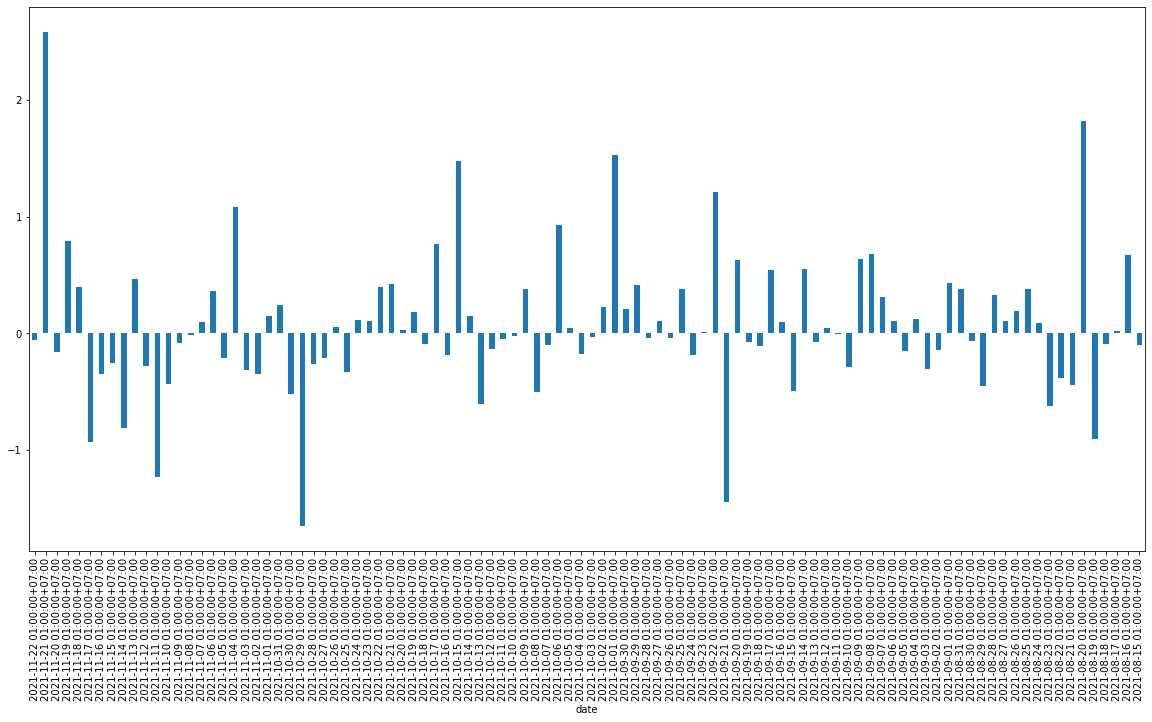

<Figure size 720x720 with 0 Axes>

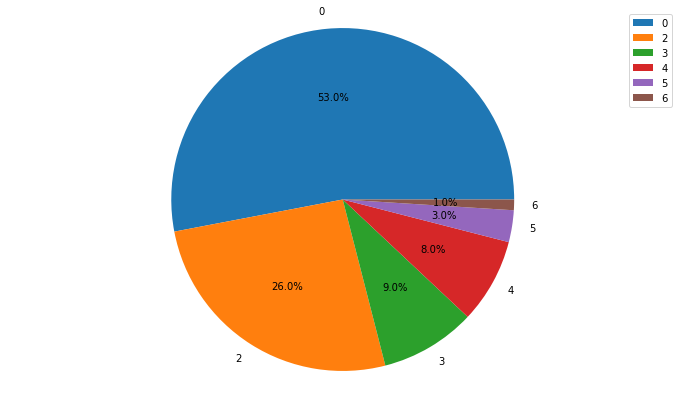

type_continuous_1
0    53
2    26
3     9
4     8
5     3
6     1
dtype: int64
None


In [5]:
hour_observe = 1

data_price_1 = None
report_by_hour(hour_observe, data_price_1)

print(data_price_1)


In [6]:
hour_observe = 2
report_by_hour(hour_observe)

TypeError: report_by_hour() missing 1 required positional argument: 'hour_df'

Giờ 3
________________________________
count    42.000000
mean      0.591383
std       0.417370
min       0.000000
25%       0.286927
50%       0.508415
75%       0.874280
max       1.614435
Name: hour_return, dtype: float64
24.838092179506468
+++
count    58.000000
mean     -0.860320
std       0.726696
min      -3.841991
25%      -1.211443
50%      -0.759439
75%      -0.302172
max      -0.044250
Name: hour_return, dtype: float64
-49.89853644615584
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


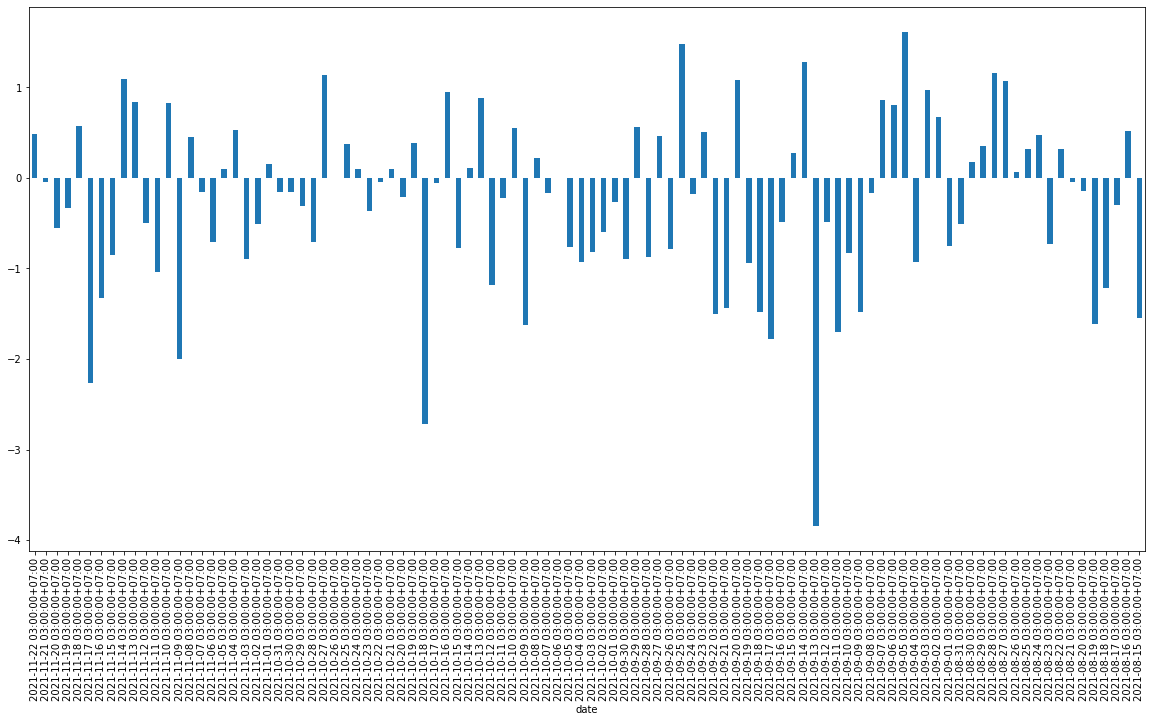

<Figure size 720x720 with 0 Axes>

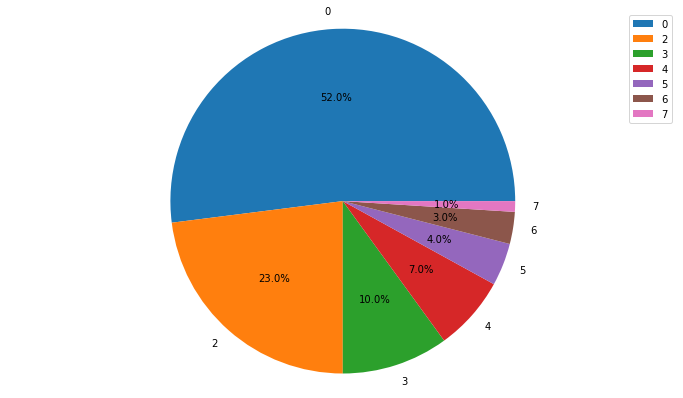

type_continuous_3
0    52
2    23
3    10
4     7
5     4
6     3
7     1
dtype: int64


In [ ]:
hour_observe = 3
report_by_hour(hour_observe)

Giờ 4
________________________________
count    60.000000
mean      0.609252
std       0.617324
min       0.000000
25%       0.207565
50%       0.451413
75%       0.721929
max       3.802281
Name: hour_return, dtype: float64
36.55513240780205
+++
count    40.000000
mean     -0.753942
std       1.067625
min      -6.632838
25%      -0.908050
50%      -0.535152
75%      -0.214967
max      -0.046019
Name: hour_return, dtype: float64
-30.15768590256408
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


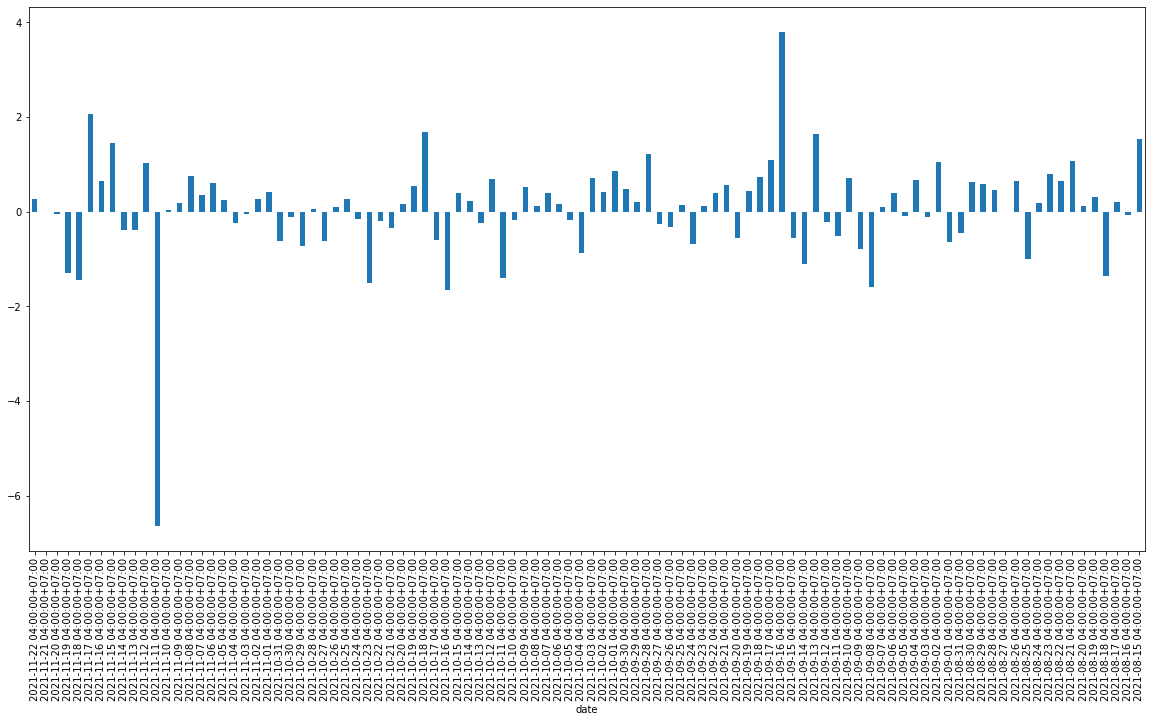

<Figure size 720x720 with 0 Axes>

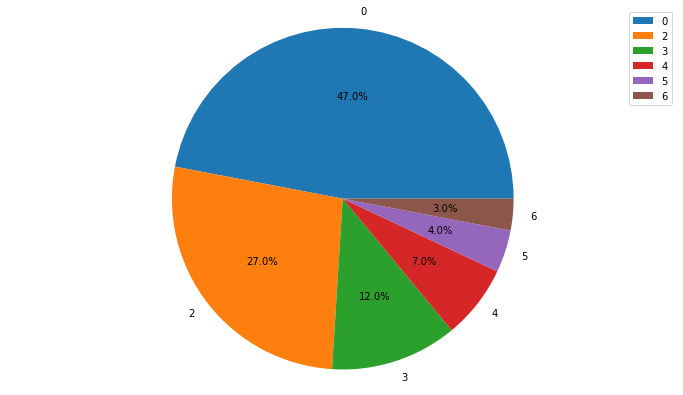

type_continuous_4
0    47
2    27
3    12
4     7
5     4
6     3
dtype: int64


In [ ]:
hour_observe = 4
report_by_hour(hour_observe)

Giờ 5
________________________________
count    49.000000
mean      0.769053
std       0.533194
min       0.052659
25%       0.374065
50%       0.647249
75%       1.047730
max       2.178899
Name: hour_return, dtype: float64
37.68357980749744
+++
count    51.000000
mean     -0.703391
std       0.610435
min      -2.574257
25%      -0.952437
50%      -0.533333
75%      -0.272370
max      -0.042845
Name: hour_return, dtype: float64
-35.8729352099032
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


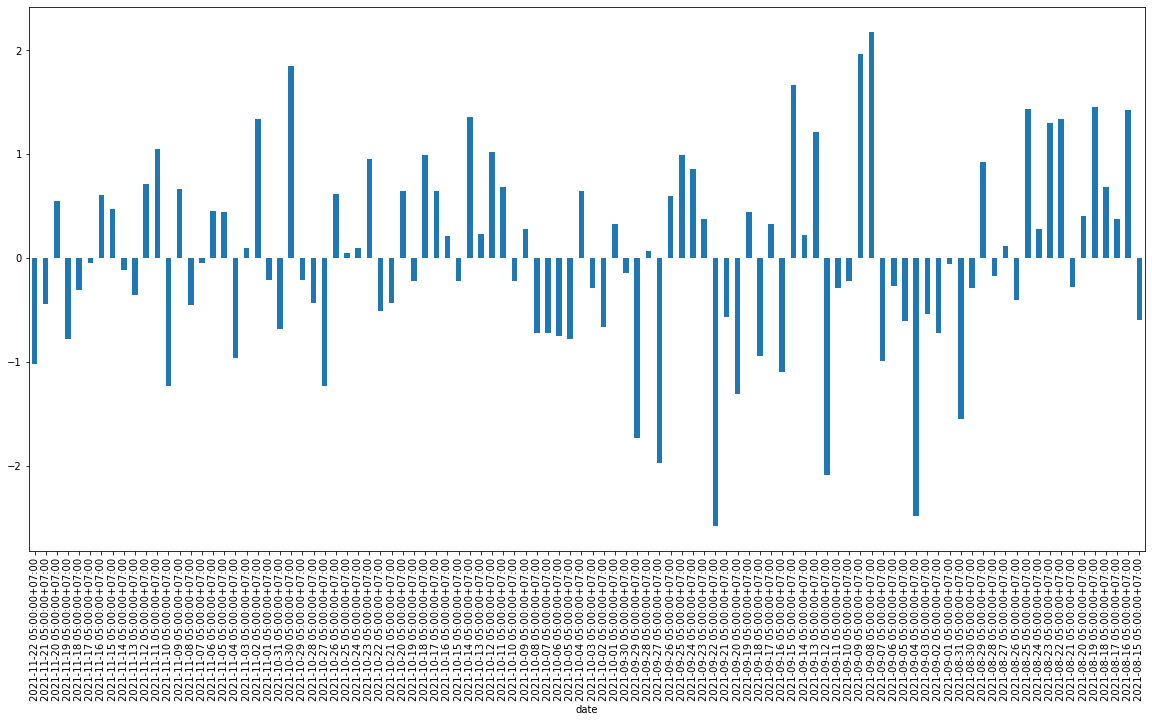

<Figure size 720x720 with 0 Axes>

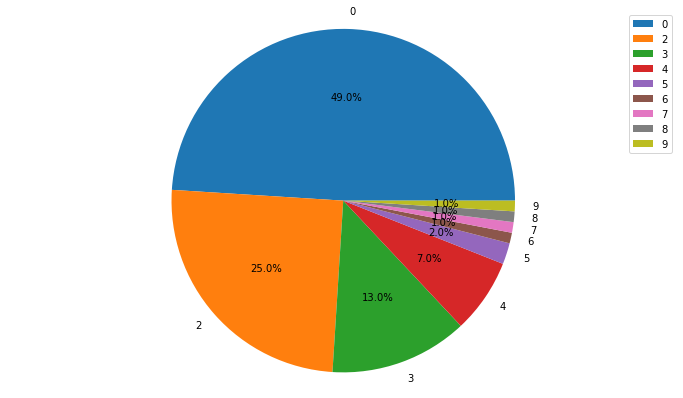

type_continuous_5
0    49
2    25
3    13
4     7
5     2
6     1
7     1
8     1
9     1
dtype: int64


In [ ]:
hour_observe = 5
report_by_hour(hour_observe)

Giờ 6
________________________________
count    54.000000
mean      0.618274
std       0.655668
min       0.000000
25%       0.176872
50%       0.445689
75%       0.782510
max       2.971175
Name: hour_return, dtype: float64
33.38681186676113
+++
count    46.000000
mean     -0.872845
std       0.706970
min      -2.488231
25%      -1.390391
50%      -0.654867
75%      -0.270287
max      -0.016039
Name: hour_return, dtype: float64
-40.15086981917009
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


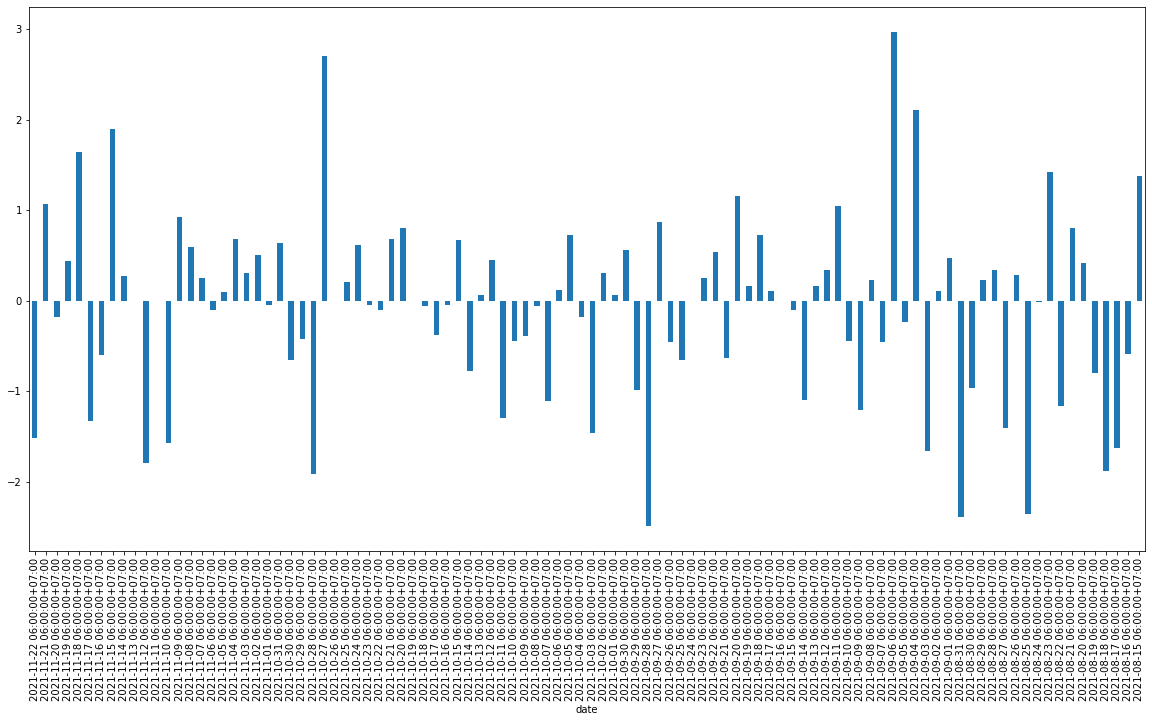

<Figure size 720x720 with 0 Axes>

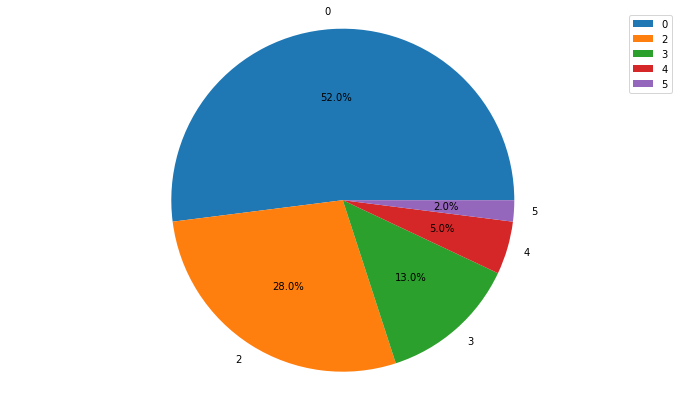

type_continuous_6
0    52
2    28
3    13
4     5
5     2
dtype: int64


In [ ]:
hour_observe = 6
report_by_hour(hour_observe)

Giờ 7
________________________________
count    52.000000
mean      1.154243
std       0.699554
min       0.045893
25%       0.694273
50%       1.031915
75%       1.499083
max       3.711790
Name: hour_return, dtype: float64
60.02064277645034
+++
count    49.000000
mean     -1.006818
std       0.682695
min      -3.992395
25%      -1.278660
50%      -0.944969
75%      -0.485961
max      -0.054615
Name: hour_return, dtype: float64
-49.3341047721376
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


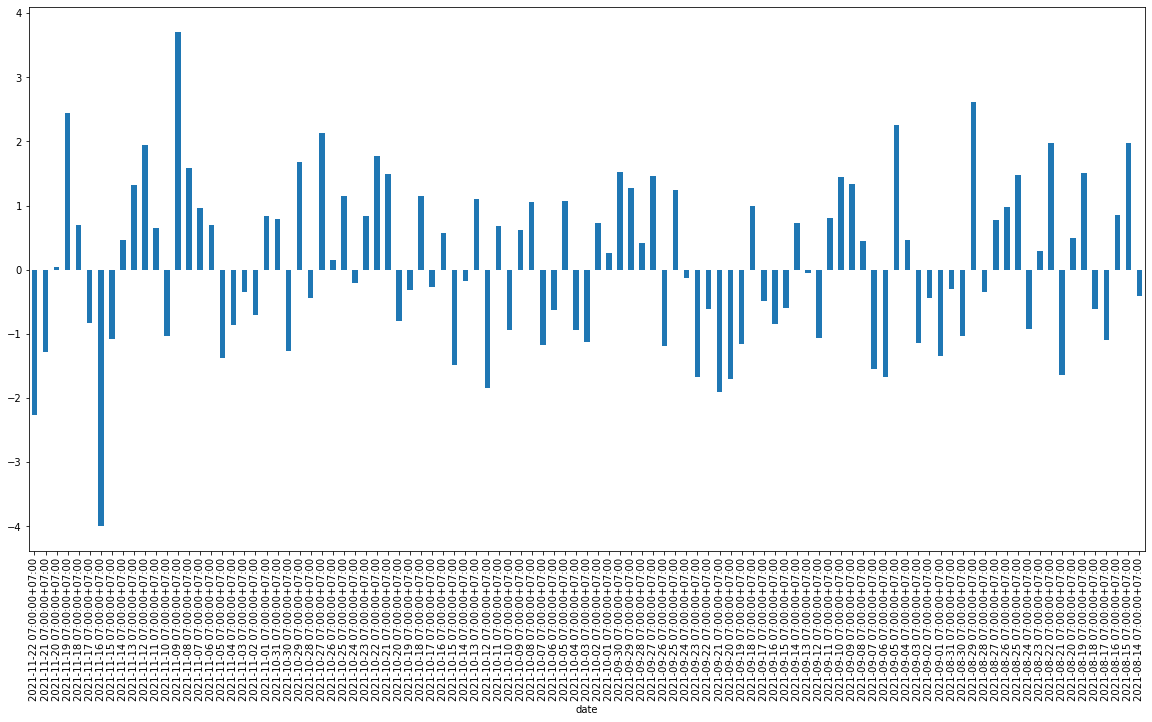

<Figure size 720x720 with 0 Axes>

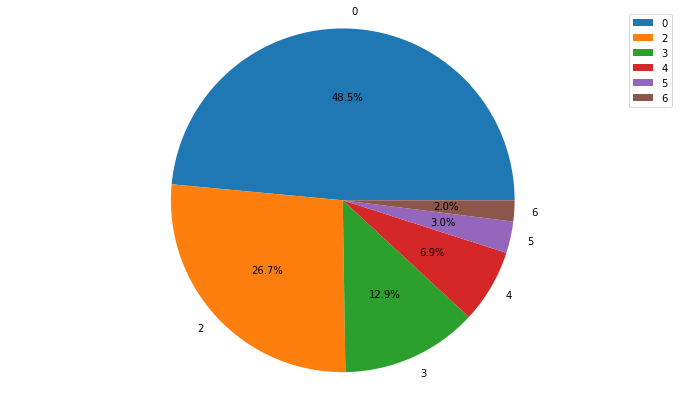

type_continuous_7
0    49
2    27
3    13
4     7
5     3
6     2
dtype: int64


In [ ]:
hour_observe = 7
report_by_hour(hour_observe)

Giờ 8
________________________________
count    52.000000
mean      0.893151
std       0.897120
min       0.000000
25%       0.239389
50%       0.599440
75%       1.194586
max       4.085603
Name: hour_return, dtype: float64
46.443851543548206
+++
count    49.000000
mean     -0.691803
std       0.541292
min      -2.594340
25%      -0.941993
50%      -0.553250
75%      -0.330033
max      -0.010954
Name: hour_return, dtype: float64
-33.898359949175564
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


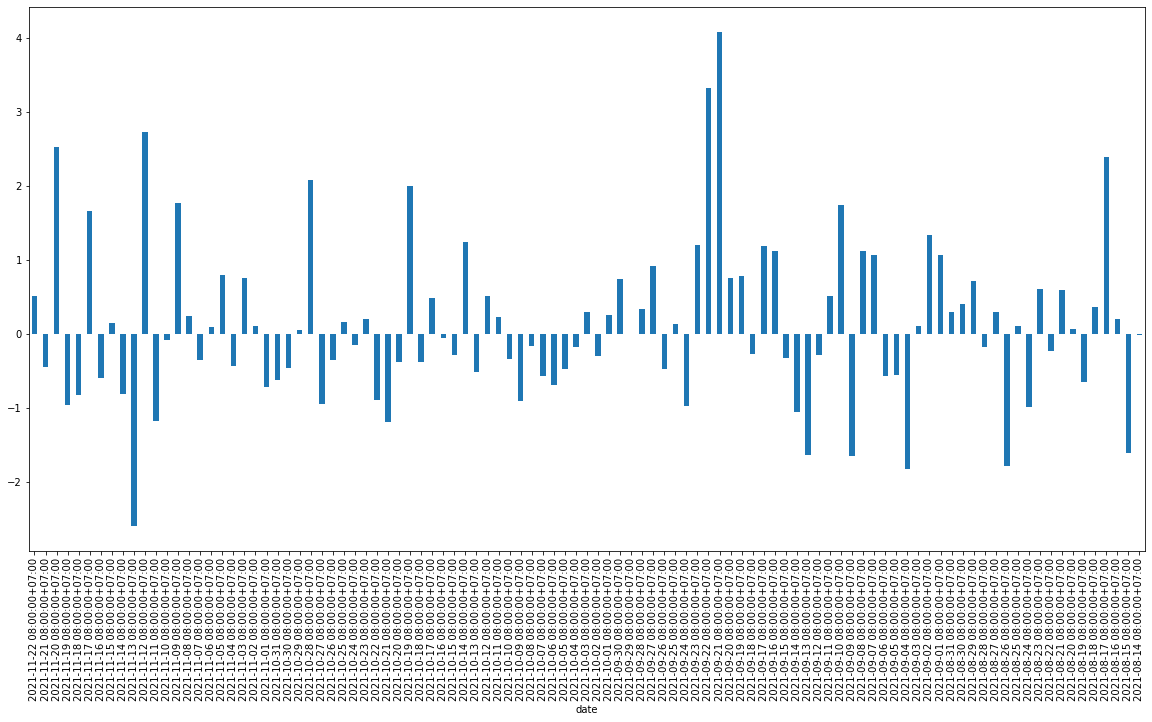

<Figure size 720x720 with 0 Axes>

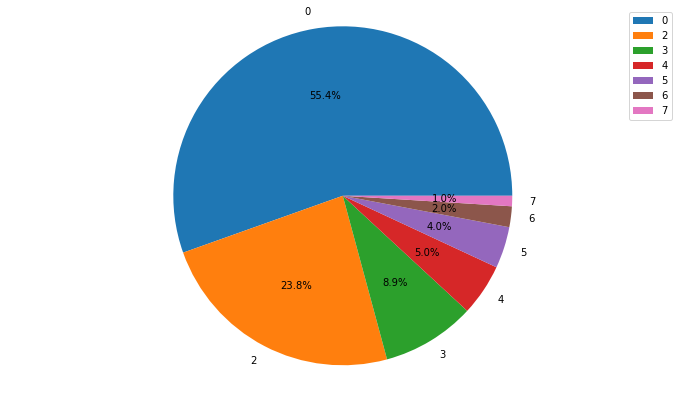

type_continuous_8
0    56
2    24
3     9
4     5
5     4
6     2
7     1
dtype: int64


In [ ]:
hour_observe = 8
report_by_hour(hour_observe)

Giờ 9
________________________________
count    51.000000
mean      0.567657
std       0.576379
min       0.000000
25%       0.186619
50%       0.359712
75%       0.727970
max       3.088153
Name: hour_return, dtype: float64
28.950497690357892
+++
count    49.000000
mean     -0.709182
std       0.729788
min      -4.372842
25%      -1.013662
50%      -0.496278
75%      -0.219660
max      -0.055402
Name: hour_return, dtype: float64
-34.74989845005686
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


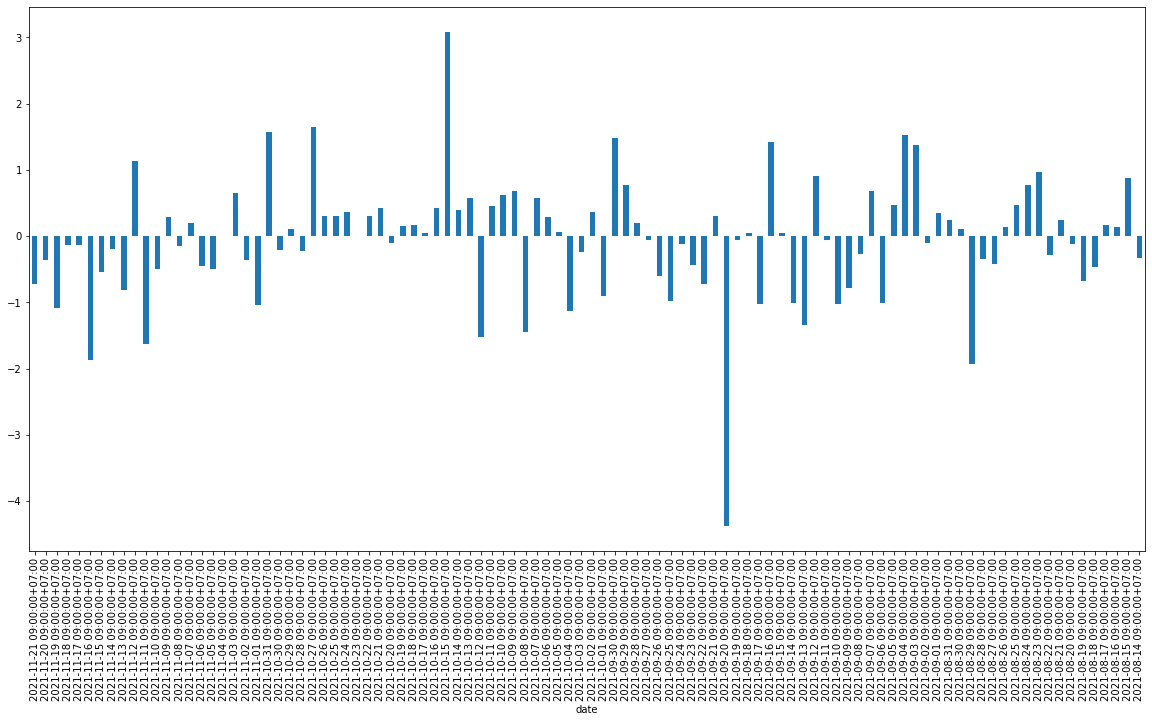

<Figure size 720x720 with 0 Axes>

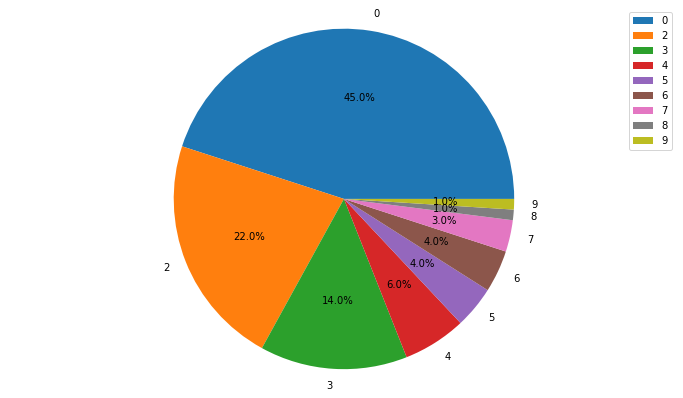

type_continuous_9
0    45
2    22
3    14
4     6
5     4
6     4
7     3
8     1
9     1
dtype: int64


In [ ]:
hour_observe = 9
report_by_hour(hour_observe)

Giờ 10
________________________________
count    51.000000
mean      0.550573
std       0.473390
min       0.000000
25%       0.190150
50%       0.487126
75%       0.813284
max       2.020619
Name: hour_return, dtype: float64
28.079226681962616
+++
count    49.000000
mean     -0.809383
std       0.689689
min      -3.146853
25%      -0.993789
50%      -0.673552
75%      -0.310078
max      -0.027448
Name: hour_return, dtype: float64
-39.65978667130508
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


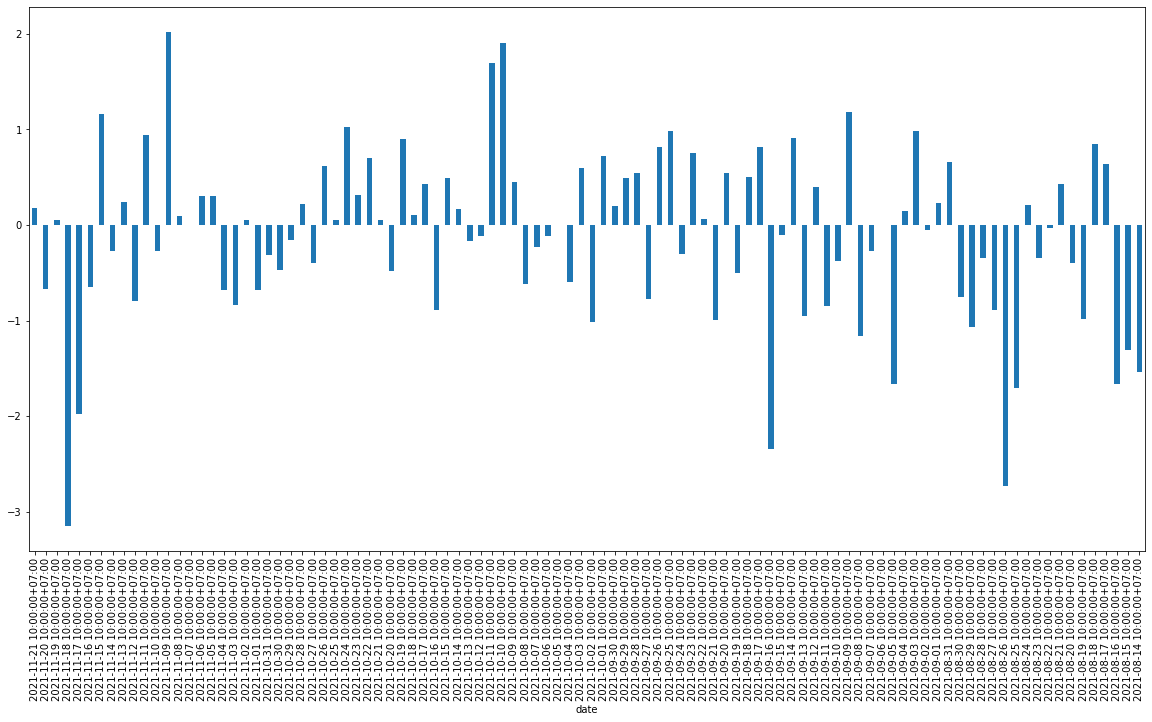

<Figure size 720x720 with 0 Axes>

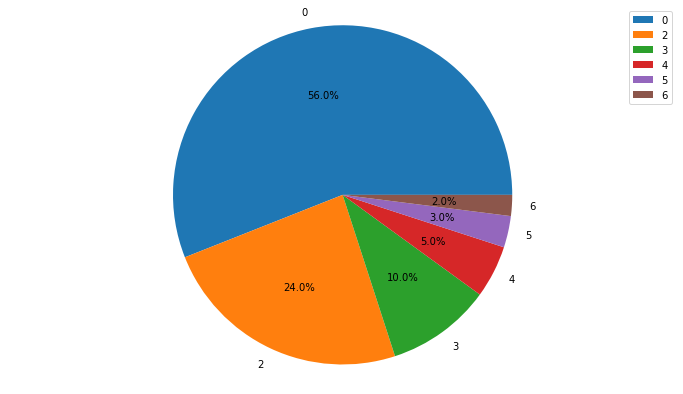

type_continuous_10
0    56
2    24
3    10
4     5
5     3
6     2
dtype: int64


In [ ]:
hour_observe = 10
report_by_hour(hour_observe)

Giờ 11
________________________________
count    52.000000
mean      0.660644
std       0.765910
min       0.000000
25%       0.204261
50%       0.399283
75%       0.854292
max       3.614458
Name: hour_return, dtype: float64
34.35349099511653
+++
count    48.000000
mean     -0.418063
std       0.388253
min      -1.738076
25%      -0.547881
50%      -0.307487
75%      -0.136293
max      -0.017255
Name: hour_return, dtype: float64
-20.0670353083052
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


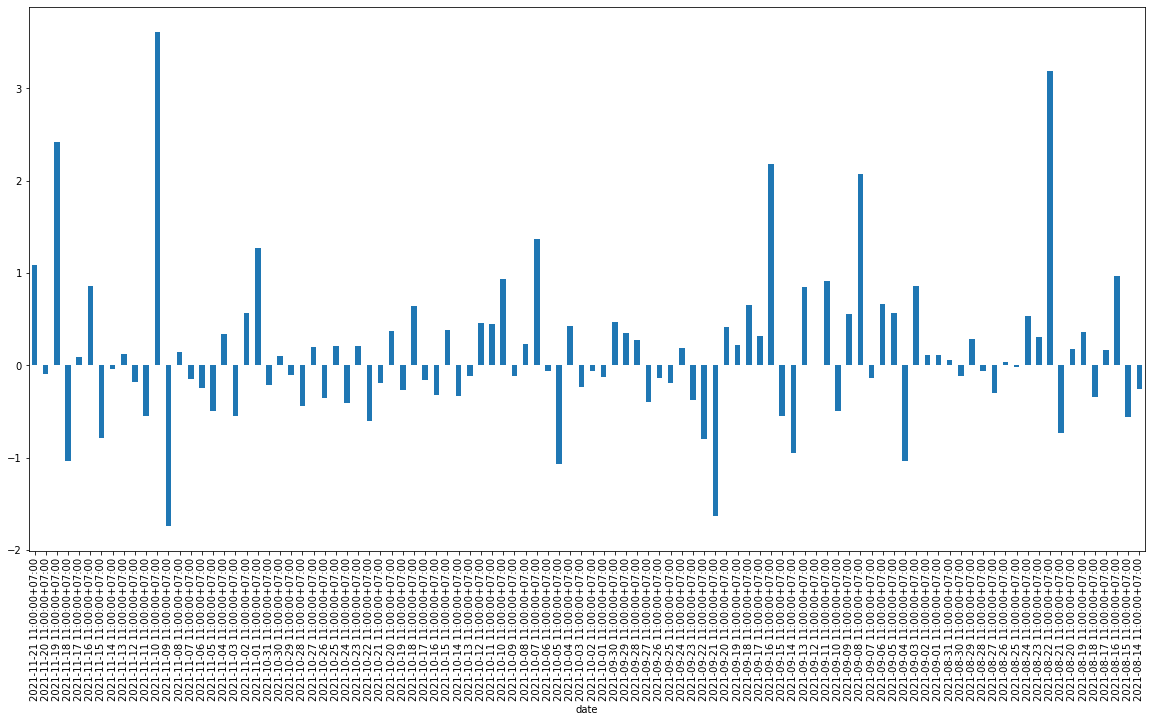

<Figure size 720x720 with 0 Axes>

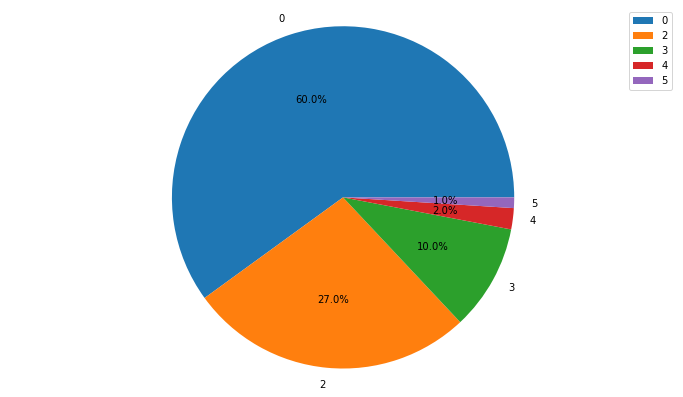

type_continuous_11
0    60
2    27
3    10
4     2
5     1
dtype: int64


In [ ]:
hour_observe = 11
report_by_hour(hour_observe)

Giờ 12
________________________________
count    56.000000
mean      0.598108
std       0.500079
min       0.000000
25%       0.248320
50%       0.495510
75%       0.697861
max       2.324645
Name: hour_return, dtype: float64
33.4940589538101
+++
count    44.000000
mean     -0.547094
std       0.564017
min      -2.760207
25%      -0.743464
50%      -0.348856
75%      -0.165566
max      -0.037602
Name: hour_return, dtype: float64
-24.072152998235296
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


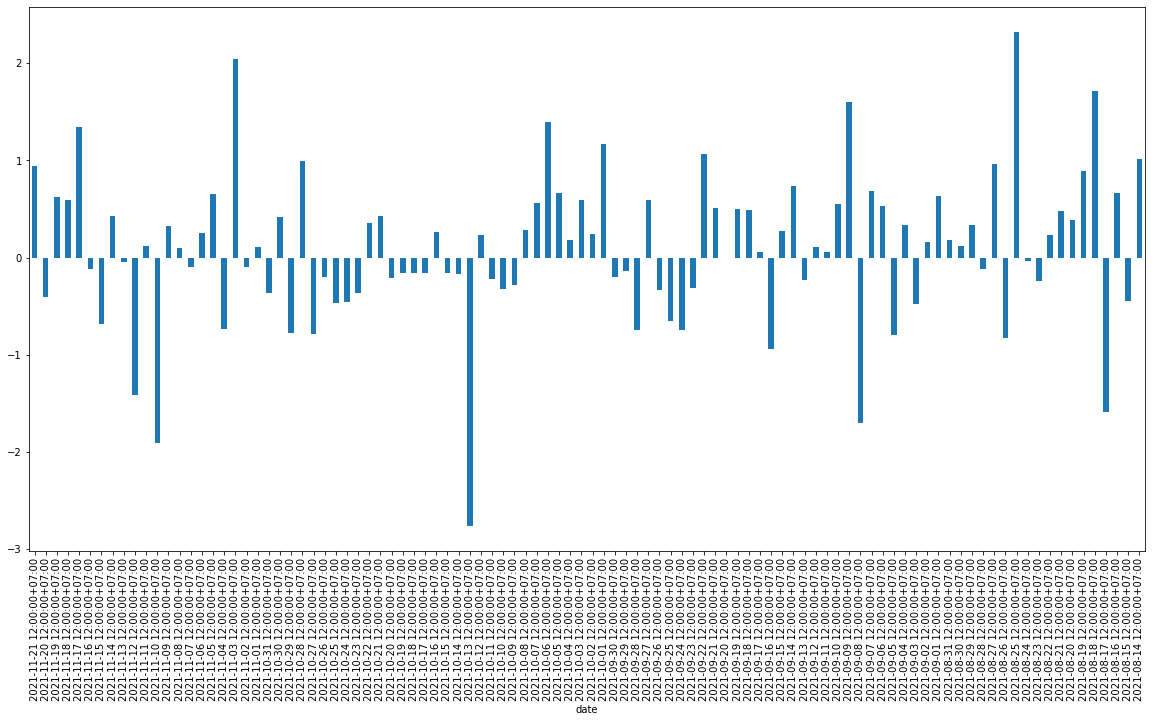

<Figure size 720x720 with 0 Axes>

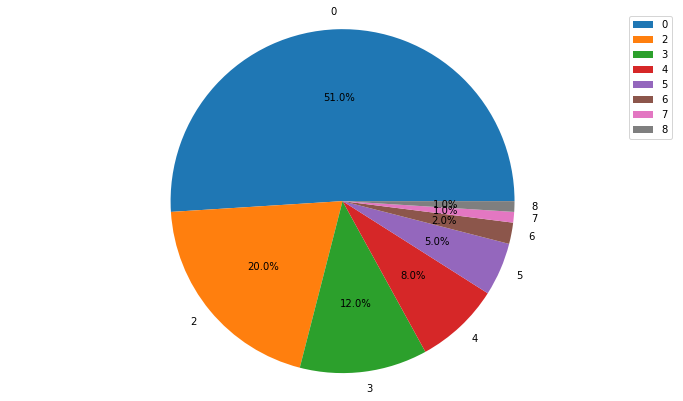

type_continuous_12
0    51
2    20
3    12
4     8
5     5
6     2
7     1
8     1
dtype: int64


In [ ]:
hour_observe = 12
report_by_hour(hour_observe)

Giờ 13
________________________________
count    51.000000
mean      0.562735
std       0.554676
min       0.000000
25%       0.194041
50%       0.505618
75%       0.759559
max       3.286206
Name: hour_return, dtype: float64
28.69946127548279
+++
count    49.000000
mean     -0.596303
std       0.602600
min      -3.740927
25%      -0.662837
50%      -0.473093
75%      -0.260552
max      -0.039608
Name: hour_return, dtype: float64
-29.218857408005153
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


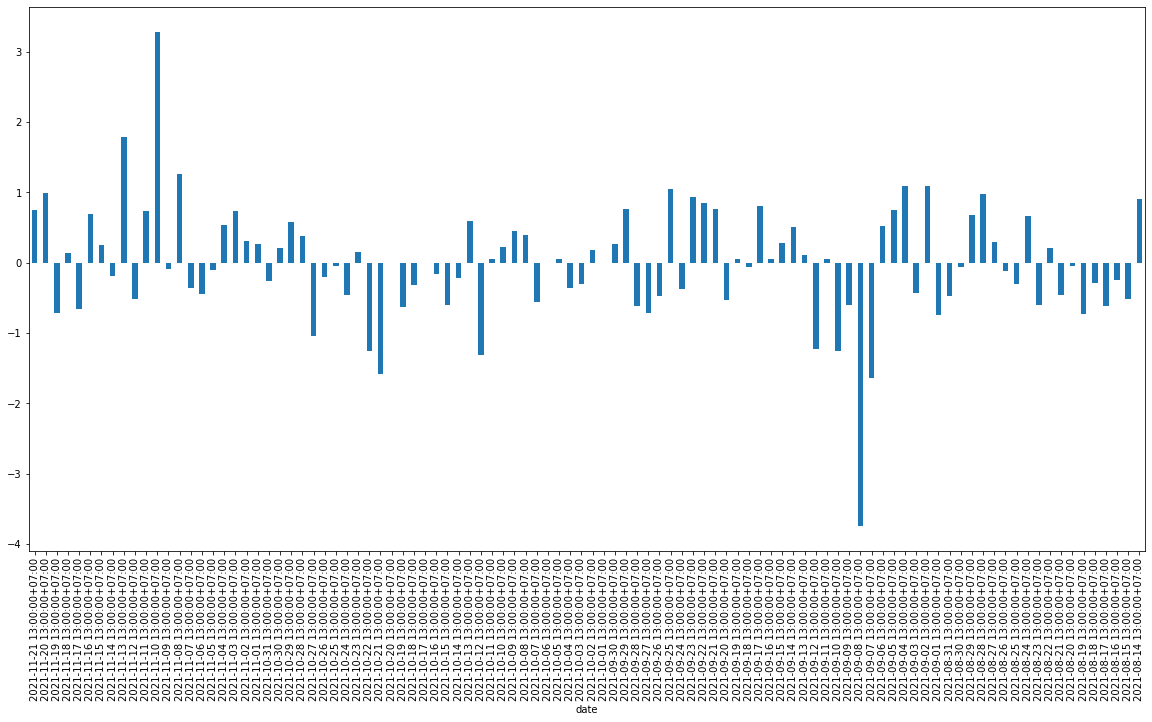

<Figure size 720x720 with 0 Axes>

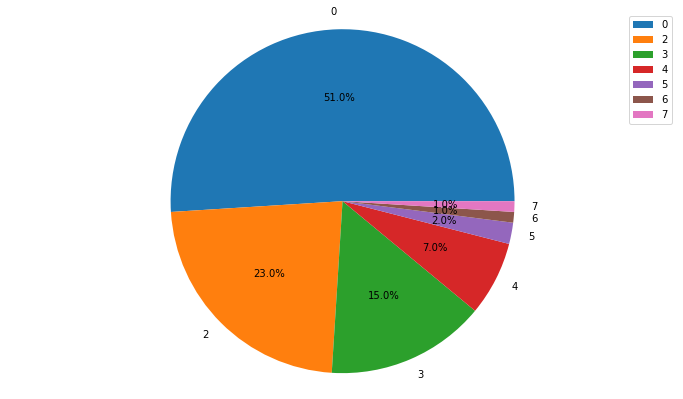

type_continuous_13
0    51
2    23
3    15
4     7
5     2
6     1
7     1
dtype: int64


In [ ]:
hour_observe = 13
report_by_hour(hour_observe)

Giờ 14
________________________________
count    47.000000
mean      0.699065
std       0.794562
min       0.000000
25%       0.135670
50%       0.506329
75%       1.015574
max       3.869882
Name: hour_return, dtype: float64
32.85606499402267
+++
count    52.000000
mean     -0.804769
std       0.732654
min      -4.214752
25%      -1.066290
50%      -0.585777
75%      -0.322819
max      -0.040535
Name: hour_return, dtype: float64
-41.84799415237026
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


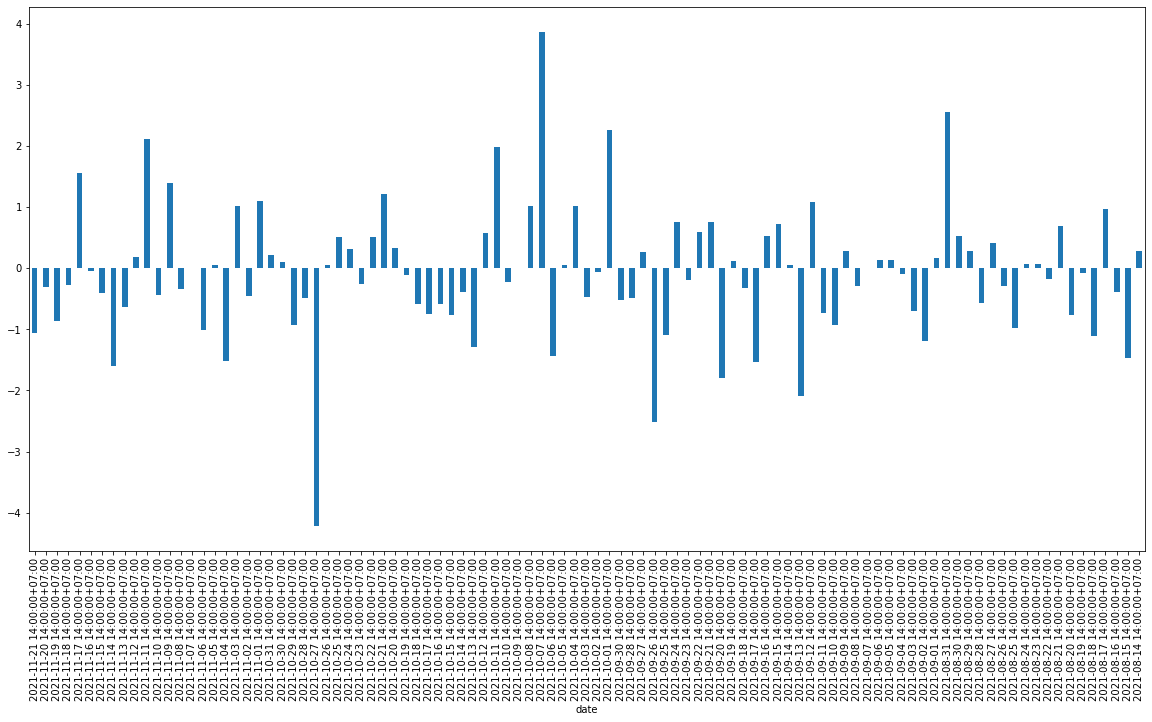

<Figure size 720x720 with 0 Axes>

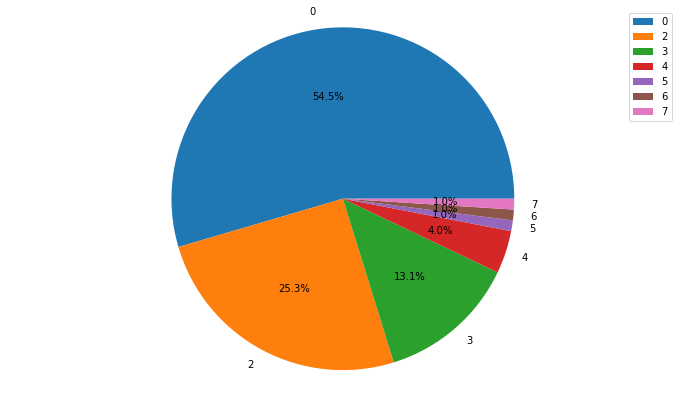

type_continuous_14
0    54
2    25
3    13
4     4
5     1
6     1
7     1
dtype: int64


In [ ]:
hour_observe = 14
report_by_hour(hour_observe)

Giờ 15
________________________________
count    58.000000
mean      0.791667
std       0.982911
min       0.000000
25%       0.188282
50%       0.423871
75%       0.728559
max       4.447566
Name: hour_return, dtype: float64
45.91670613346275
+++
count    41.000000
mean     -0.765151
std       0.843665
min      -3.352541
25%      -0.805452
50%      -0.530504
75%      -0.261952
max      -0.050684
Name: hour_return, dtype: float64
-31.371188313419953
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


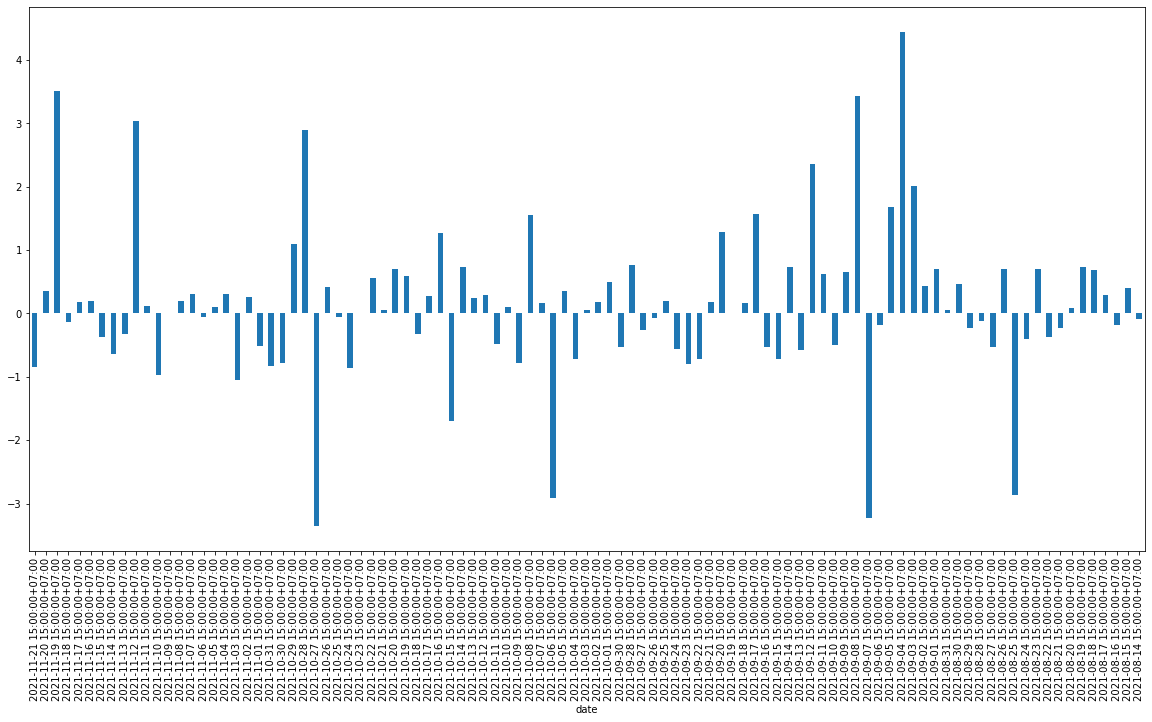

<Figure size 720x720 with 0 Axes>

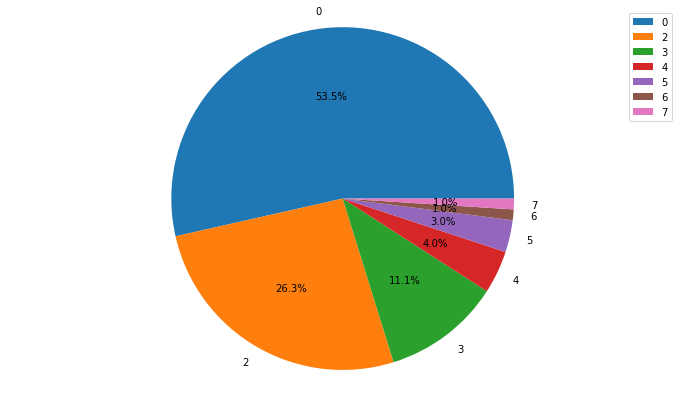

type_continuous_15
0    53
2    26
3    11
4     4
5     3
6     1
7     1
dtype: int64


In [ ]:
hour_observe = 15
report_by_hour(hour_observe)

Giờ 16
________________________________
count    51.000000
mean      0.745496
std       0.895627
min       0.000000
25%       0.204275
50%       0.406268
75%       0.961438
max       4.881450
Name: hour_return, dtype: float64
38.02031972667487
+++
count    49.000000
mean     -0.994860
std       1.323841
min      -7.191995
25%      -1.145268
50%      -0.518732
75%      -0.275103
max      -0.059277
Name: hour_return, dtype: float64
-48.74812634509253
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


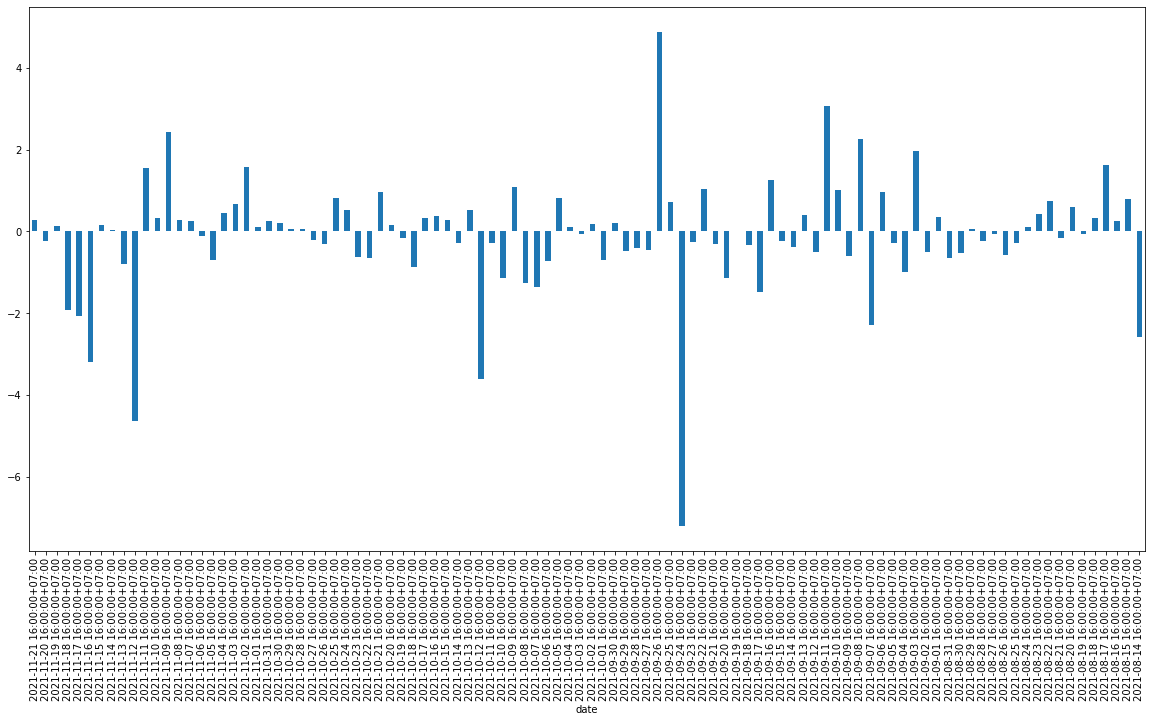

<Figure size 720x720 with 0 Axes>

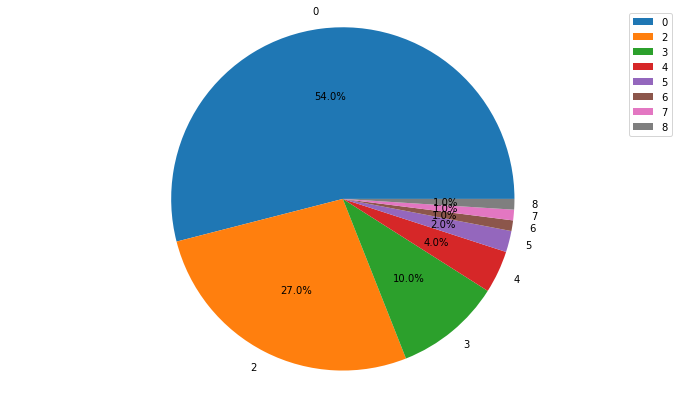

type_continuous_16
0    54
2    27
3    10
4     4
5     2
6     1
7     1
8     1
dtype: int64


In [ ]:
hour_observe = 16
report_by_hour(hour_observe)

Giờ 17
________________________________
count    45.000000
mean      0.790438
std       0.921503
min       0.000000
25%       0.197922
50%       0.527704
75%       0.987306
max       4.263207
Name: hour_return, dtype: float64
35.56969872666324
+++
count    55.000000
mean     -0.689570
std       0.540323
min      -2.533937
25%      -0.923478
50%      -0.570342
75%      -0.279946
max      -0.053619
Name: hour_return, dtype: float64
-37.926352195104286
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


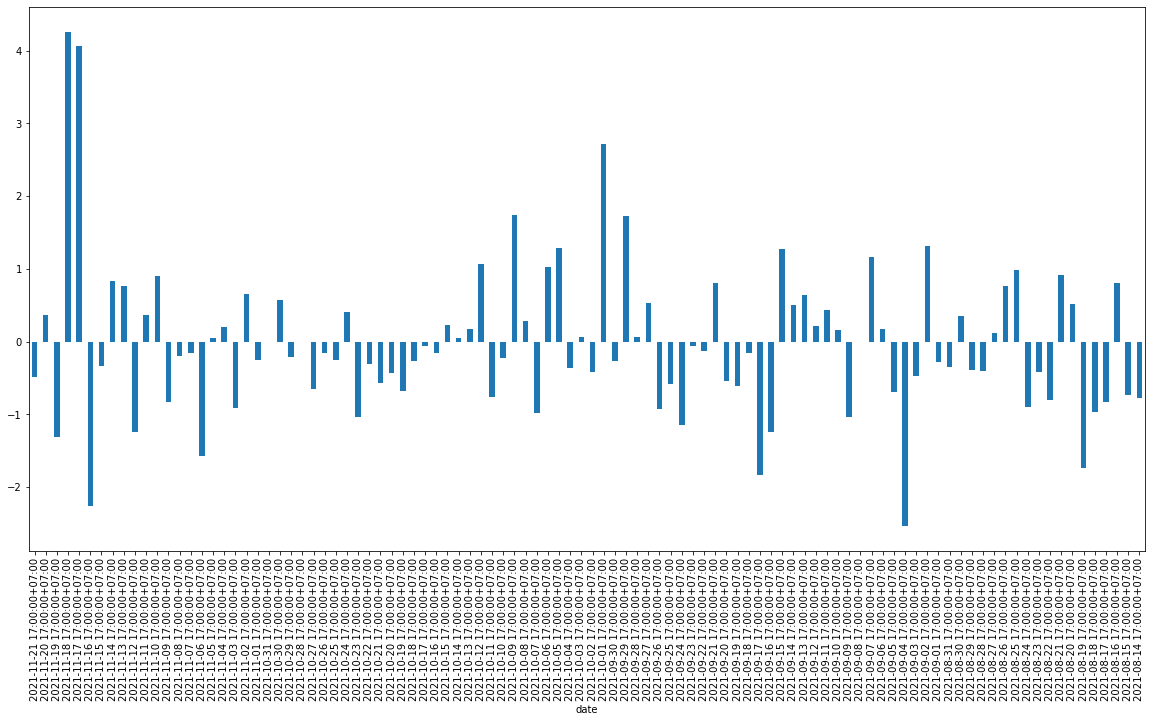

<Figure size 720x720 with 0 Axes>

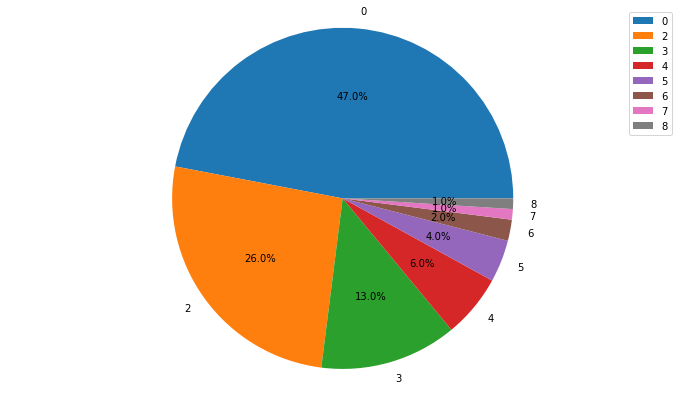

type_continuous_17
0    47
2    26
3    13
4     6
5     4
6     2
7     1
8     1
dtype: int64


In [ ]:
hour_observe = 17
report_by_hour(hour_observe)

Giờ 18
________________________________
count    53.000000
mean      0.866947
std       1.023957
min       0.000000
25%       0.368324
50%       0.600400
75%       1.136979
max       6.790353
Name: hour_return, dtype: float64
45.94818413318344
+++
count    47.000000
mean     -0.931205
std       0.813782
min      -3.553922
25%      -1.270013
50%      -0.761570
75%      -0.418854
max      -0.047687
Name: hour_return, dtype: float64
-43.76661735207403
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


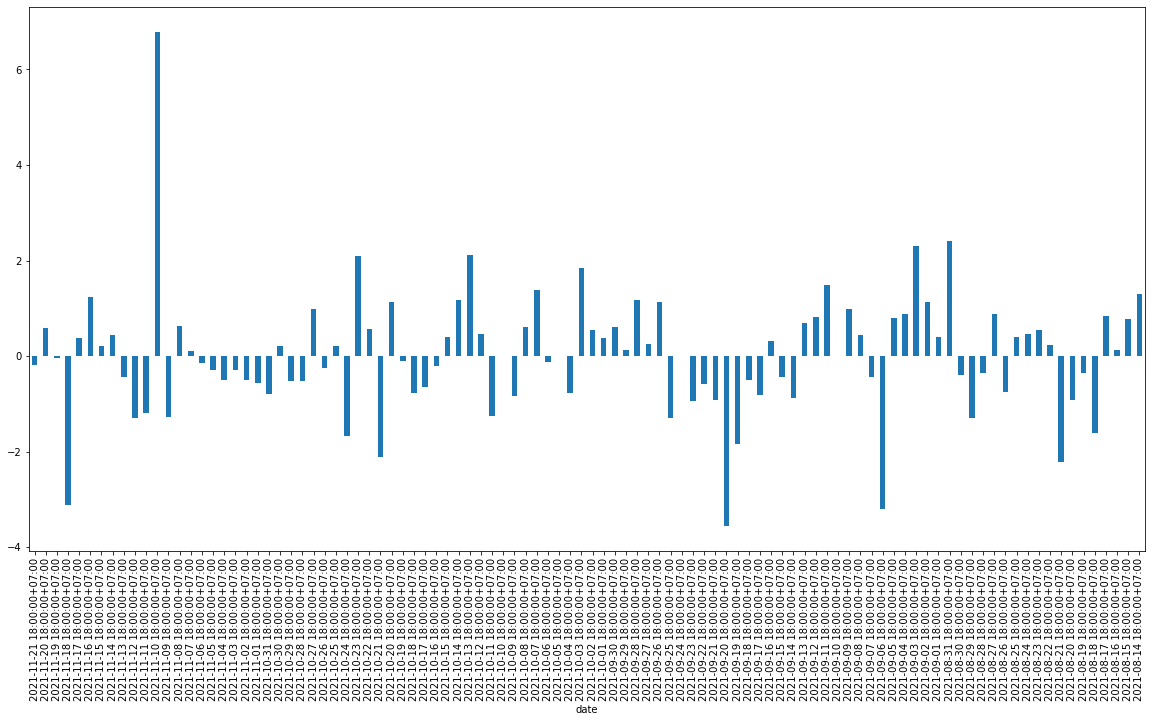

<Figure size 720x720 with 0 Axes>

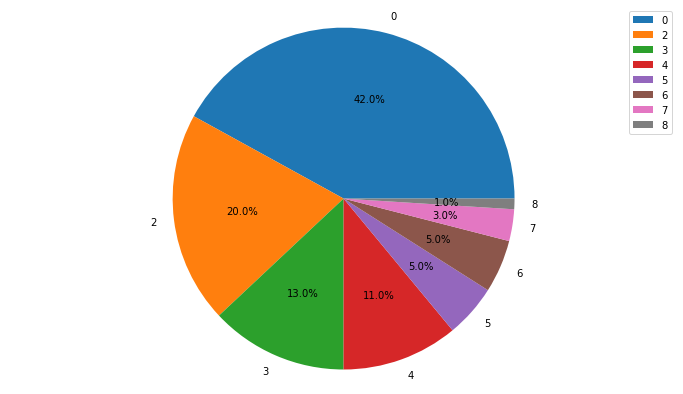

type_continuous_18
0    42
2    20
3    13
4    11
5     5
6     5
7     3
8     1
dtype: int64


In [ ]:
hour_observe = 18
report_by_hour(hour_observe)

Giờ 19
________________________________
count    46.000000
mean      0.772043
std       1.003832
min       0.000000
25%       0.277637
50%       0.503129
75%       0.876430
max       6.302521
Name: hour_return, dtype: float64
35.5139872033529
+++
count    54.000000
mean     -0.683495
std       0.576549
min      -2.292683
25%      -0.971482
50%      -0.603686
75%      -0.262507
max      -0.049925
Name: hour_return, dtype: float64
-36.90872816879037
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


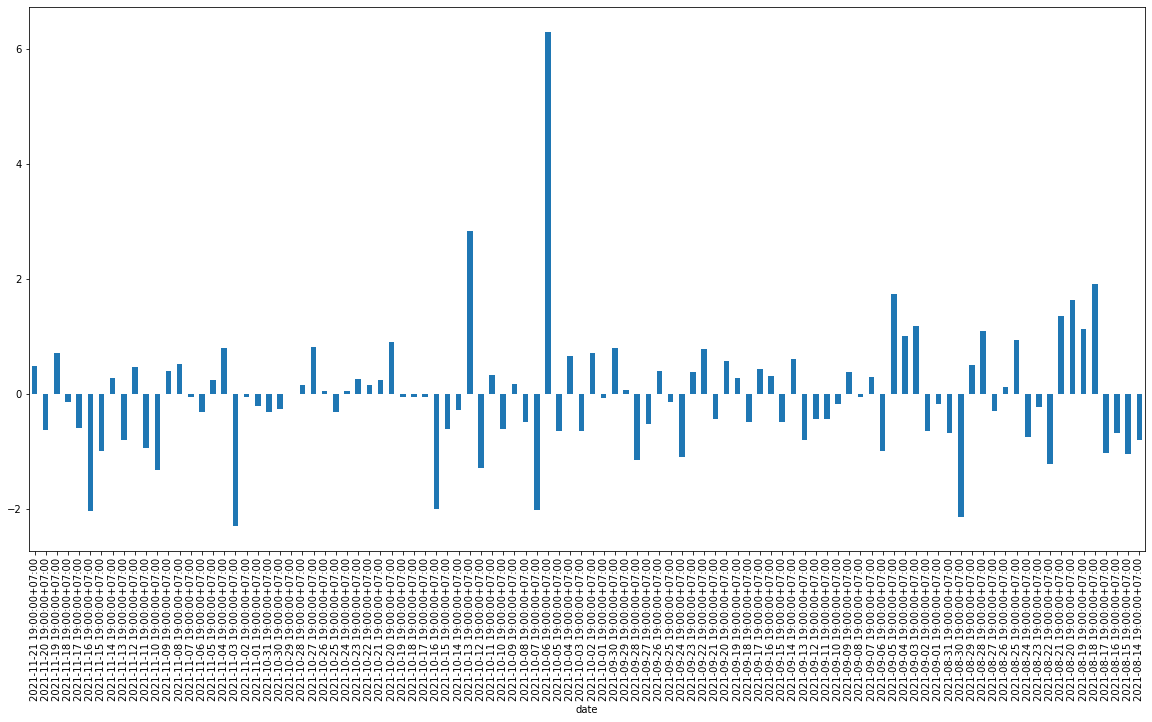

<Figure size 720x720 with 0 Axes>

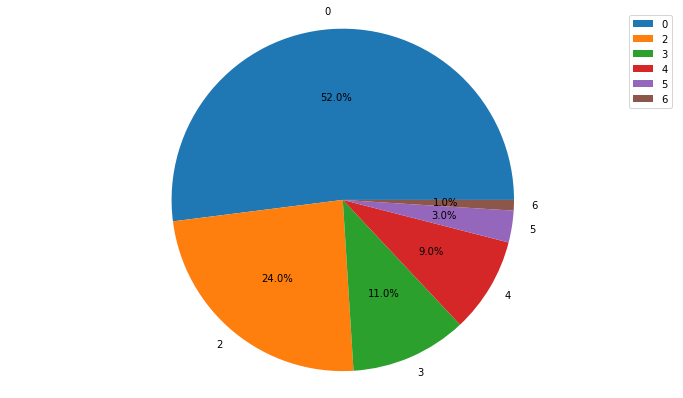

type_continuous_19
0    52
2    24
3    11
4     9
5     3
6     1
dtype: int64


In [ ]:
hour_observe = 19
report_by_hour(hour_observe)

Giờ 20
________________________________
count    65.000000
mean      1.269329
std       3.073175
min       0.000000
25%       0.329164
50%       0.662252
75%       1.323773
max      24.942529
Name: hour_return, dtype: float64
82.50641183386392
+++
count    35.000000
mean     -0.813930
std       0.760626
min      -3.314607
25%      -1.121904
50%      -0.558659
75%      -0.328485
max      -0.050302
Name: hour_return, dtype: float64
-28.487540368692194
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


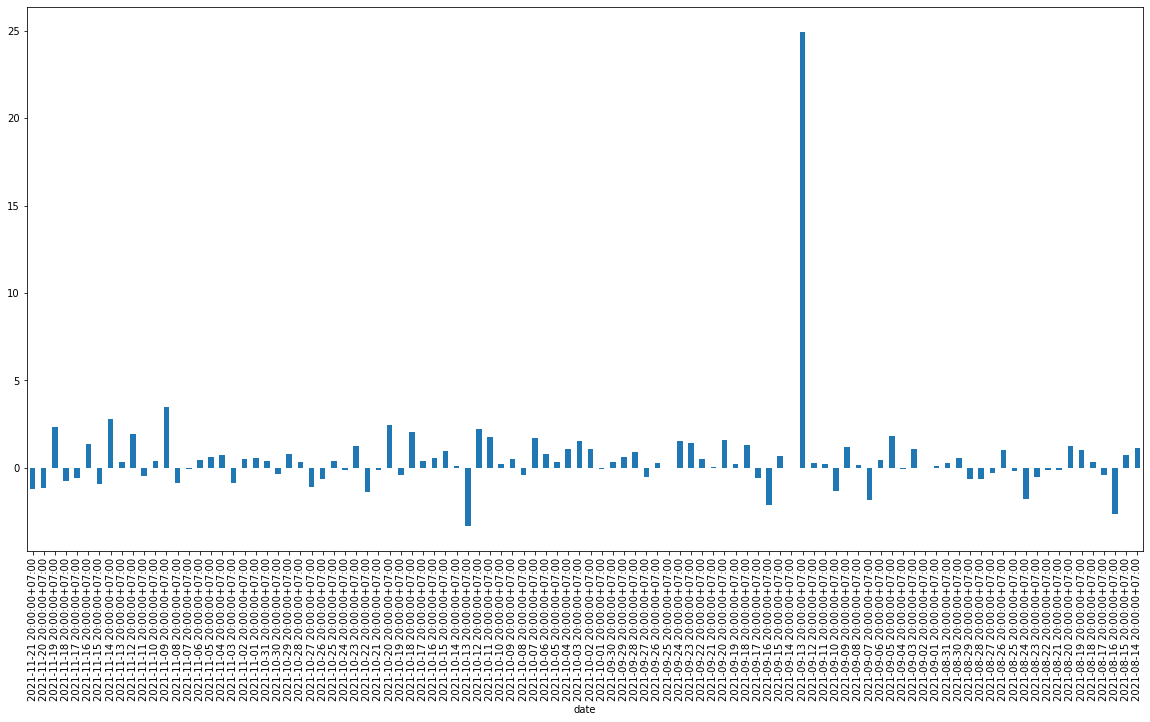

<Figure size 720x720 with 0 Axes>

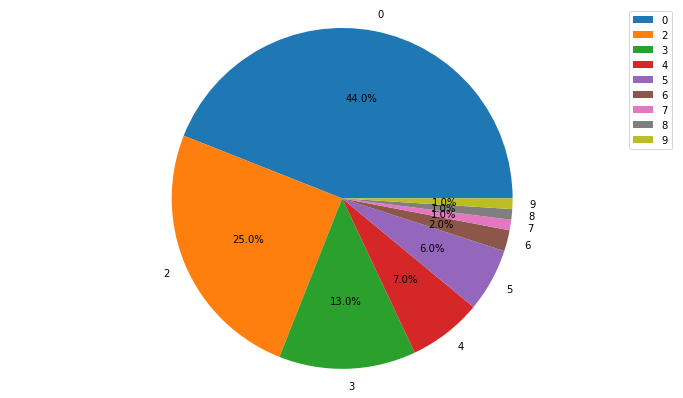

type_continuous_20
0    44
2    25
3    13
4     7
5     6
6     2
7     1
8     1
9     1
dtype: int64


In [ ]:
hour_observe = 20
report_by_hour(hour_observe)

Giờ 21
________________________________
count    46.000000
mean      0.868457
std       1.010580
min       0.000000
25%       0.198854
50%       0.605647
75%       1.095392
max       5.596107
Name: hour_return, dtype: float64
39.94903048749018
+++
count    54.000000
mean     -1.530690
std       2.669118
min     -17.909761
25%      -1.590759
50%      -0.899063
75%      -0.542596
max      -0.054083
Name: hour_return, dtype: float64
-82.65726023359196
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


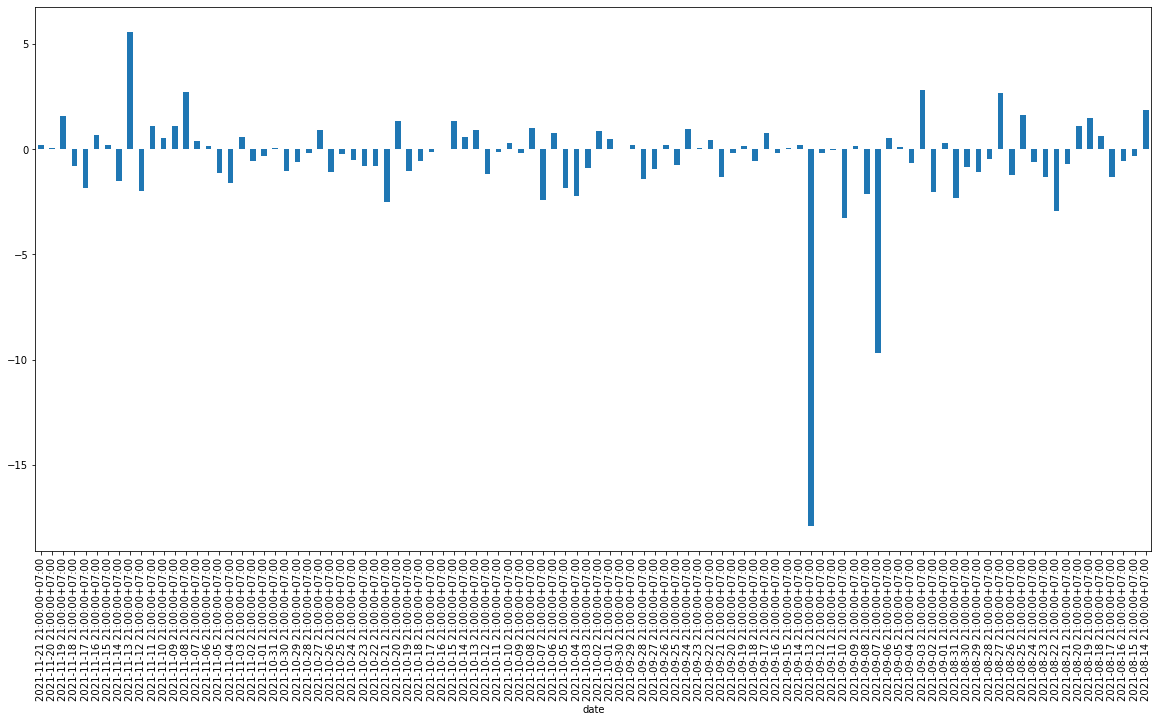

<Figure size 720x720 with 0 Axes>

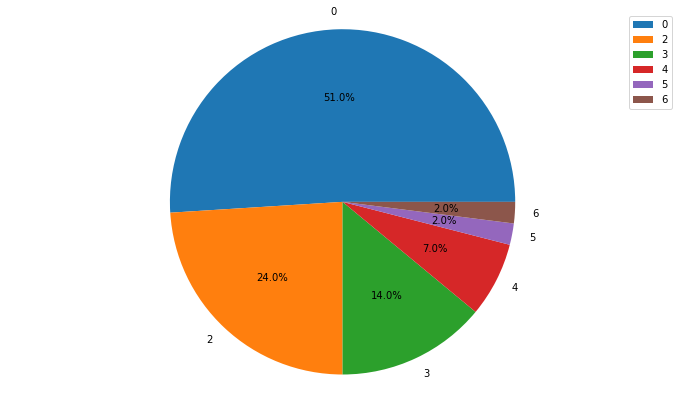

type_continuous_21
0    51
2    24
3    14
4     7
5     2
6     2
dtype: int64


In [ ]:
hour_observe = 21
report_by_hour(hour_observe)

Giờ 22
________________________________
count    60.000000
mean      0.827212
std       0.655387
min       0.000000
25%       0.277830
50%       0.669422
75%       1.231939
max       2.872984
Name: hour_return, dtype: float64
49.63273150451167
+++
count    40.000000
mean     -0.854332
std       0.695001
min      -3.343582
25%      -1.130964
50%      -0.695758
75%      -0.386383
max      -0.053191
Name: hour_return, dtype: float64
-34.173273283020336
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


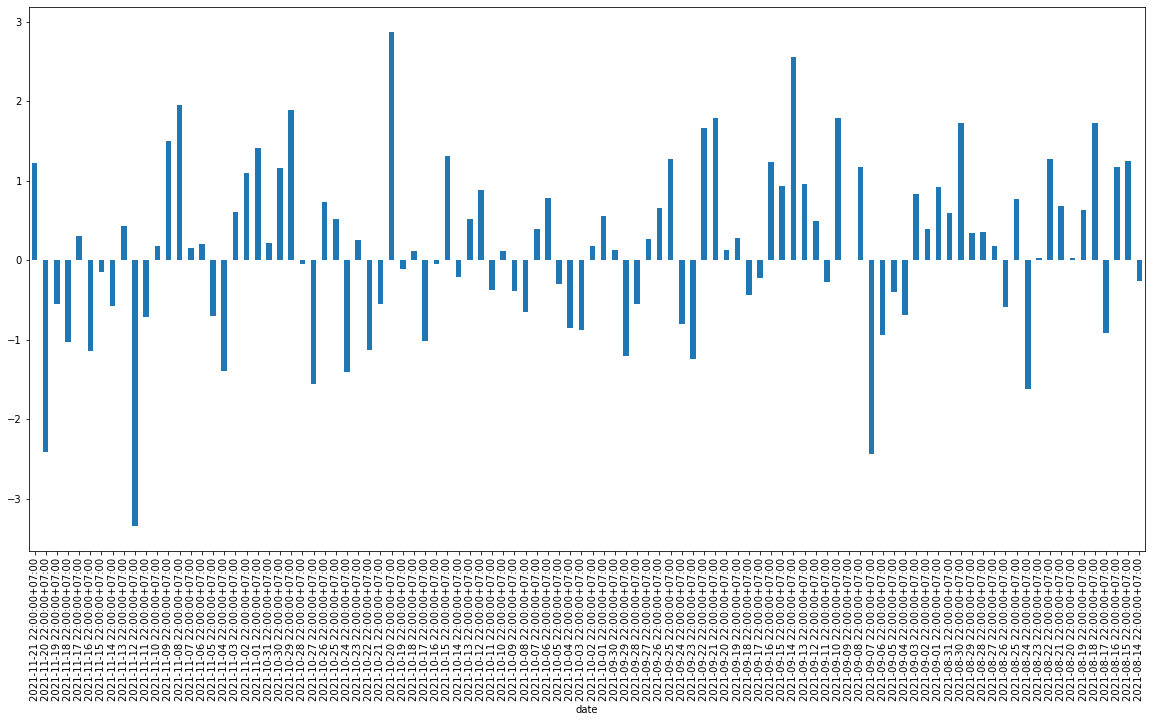

<Figure size 720x720 with 0 Axes>

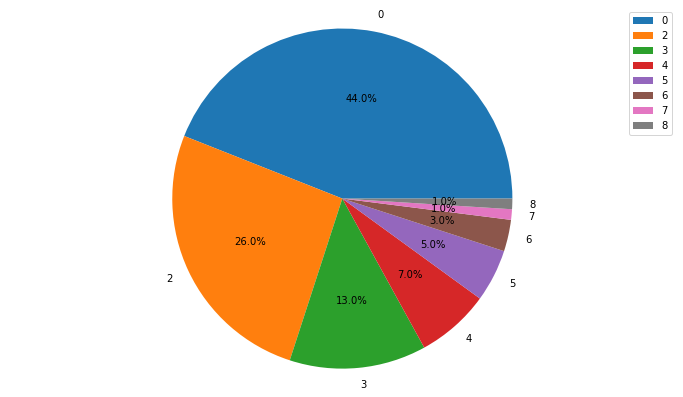

type_continuous_22
0    44
2    26
3    13
4     7
5     5
6     3
7     1
8     1
dtype: int64


In [ ]:
hour_observe = 22
report_by_hour(hour_observe)

Giờ 23
________________________________
count    54.000000
mean      0.727308
std       0.730994
min       0.000000
25%       0.240848
50%       0.449214
75%       1.026662
max       3.285078
Name: hour_return, dtype: float64
39.2746446277476
+++
count    46.000000
mean     -0.639633
std       0.555122
min      -2.781707
25%      -0.788419
50%      -0.533567
75%      -0.271958
max      -0.057274
Name: hour_return, dtype: float64
-29.42312920764635
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


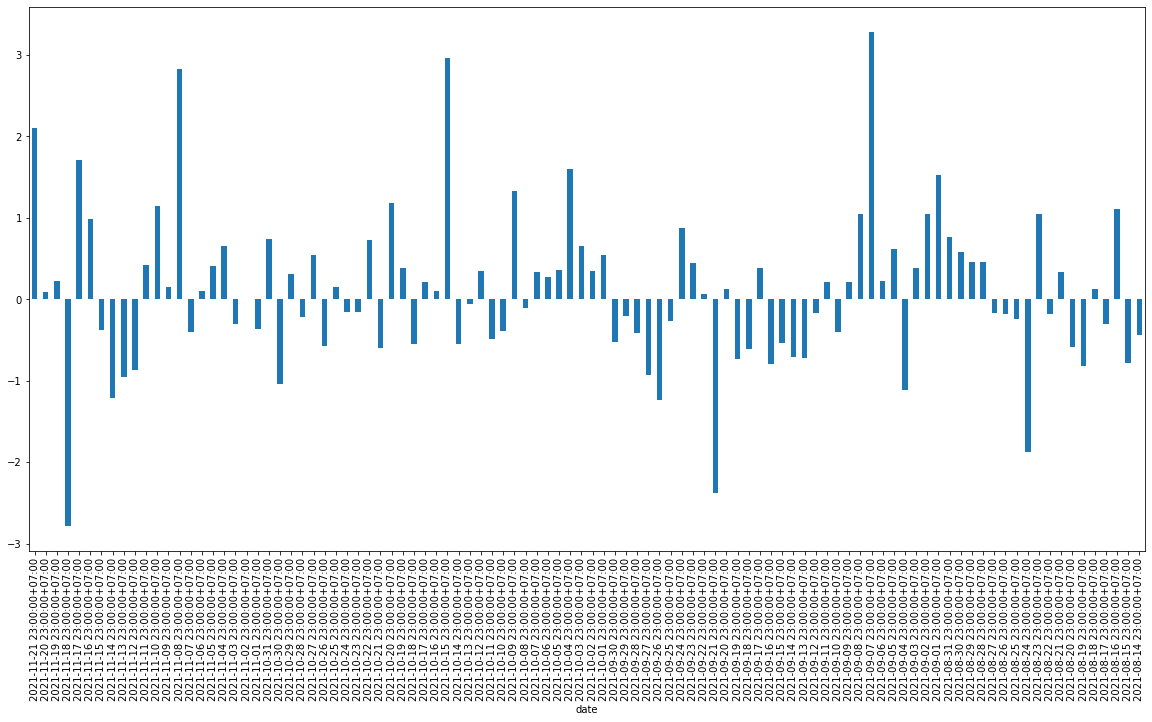

<Figure size 720x720 with 0 Axes>

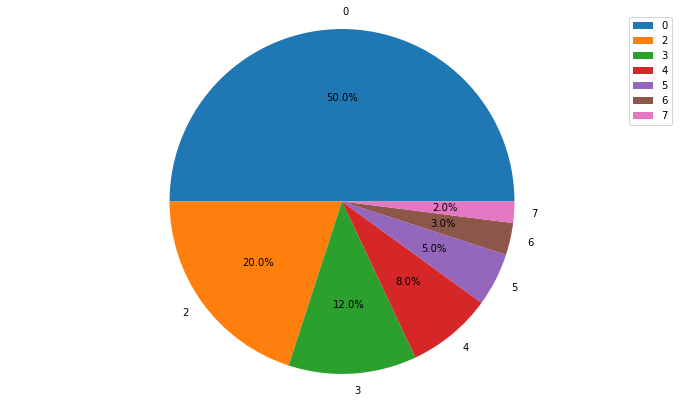

type_continuous_23
0    50
2    20
3    12
4     8
5     5
6     3
7     2
dtype: int64


In [ ]:
hour_observe = 23
report_by_hour(hour_observe)

Giờ 0
________________________________
count    45.000000
mean      0.746703
std       1.172447
min       0.000000
25%       0.132363
50%       0.449102
75%       0.677083
max       6.996047
Name: hour_return, dtype: float64
33.60163377611355
+++
count    55.000000
mean     -0.606150
std       0.444355
min      -2.155172
25%      -0.900919
50%      -0.566135
75%      -0.238327
max      -0.050201
Name: hour_return, dtype: float64
-33.33823216731338
____________________________________________________________


<ipython-input-2-8252a8b774a3>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_prices_by_hour[type_continuous_str] = type_continuous(data_prices_by_hour, 'ASC')


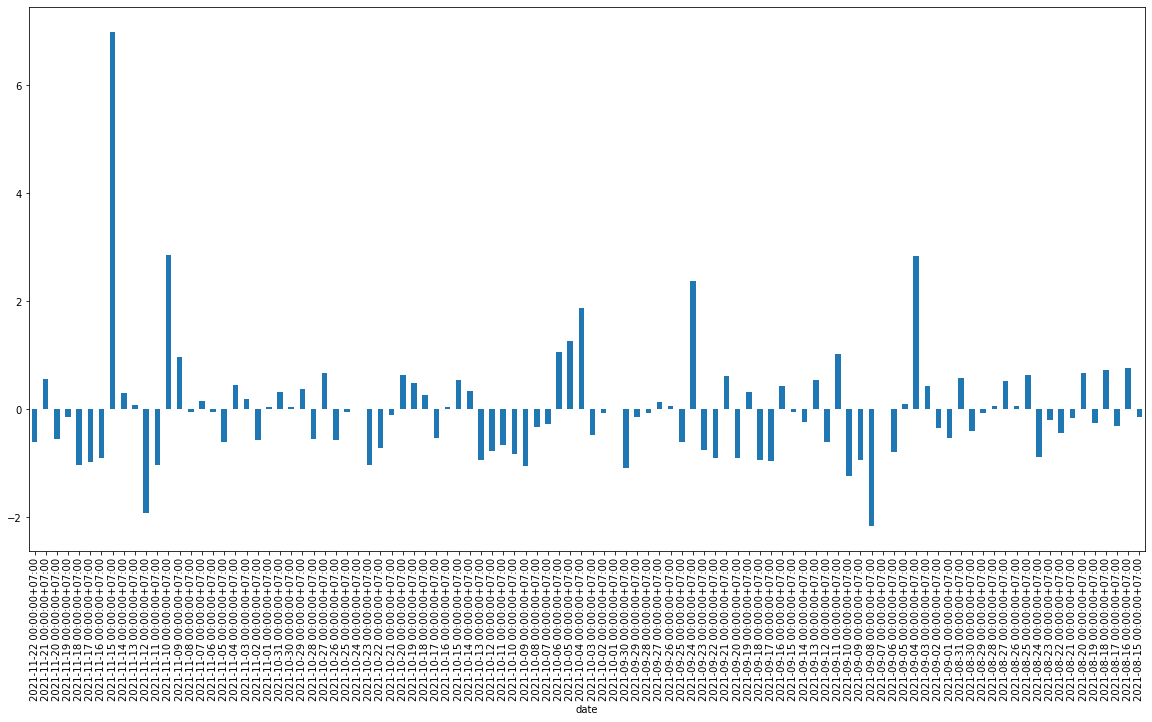

<Figure size 720x720 with 0 Axes>

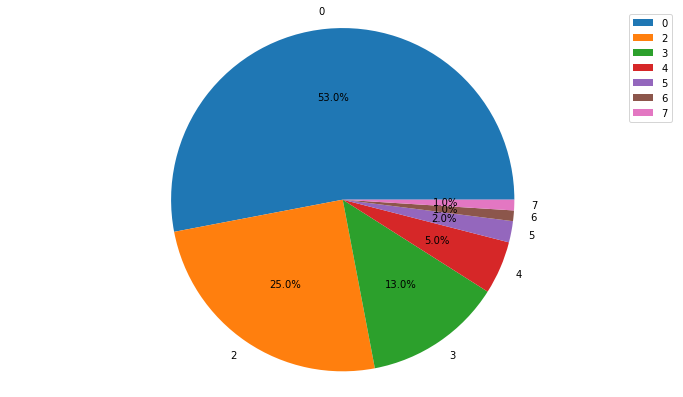

type_continuous_0
0    53
2    25
3    13
4     5
5     2
6     1
7     1
dtype: int64


In [ ]:
hour_observe = 0
report_by_hour(hour_observe)

In [ ]:
print(data_prices_1)

NameError: name 'data_prices_1' is not defined